In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [15]:
df = pd.read_csv('DATA/heart_disease_dataset_01.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,66,0,2,114,352,0,1,165,0,0.0,2,2,2,0
1,72,1,0,134,459,0,0,197,1,3.8,2,2,2,1
2,41,1,2,144,291,0,0,156,1,1.8,2,2,3,0
3,37,0,1,98,386,0,2,131,0,0.2,0,0,1,1
4,38,0,2,103,425,1,0,169,0,4.0,1,1,3,1


In [16]:
num_features = df.shape[1] - 1
num_classes = df.iloc[:, -1].nunique()

print(f"Number of features: {num_features}")
print(f"Number of target classes: {num_classes}")
print(f"Target class distribution:\n{df.iloc[:, -1].value_counts()}\n")

Number of features: 13
Number of target classes: 2
Target class distribution:
target
1    160
0    143
Name: count, dtype: int64



In [17]:
features_to_plot = df.columns[:-1][:4].tolist()
target_col = df.columns[-1]

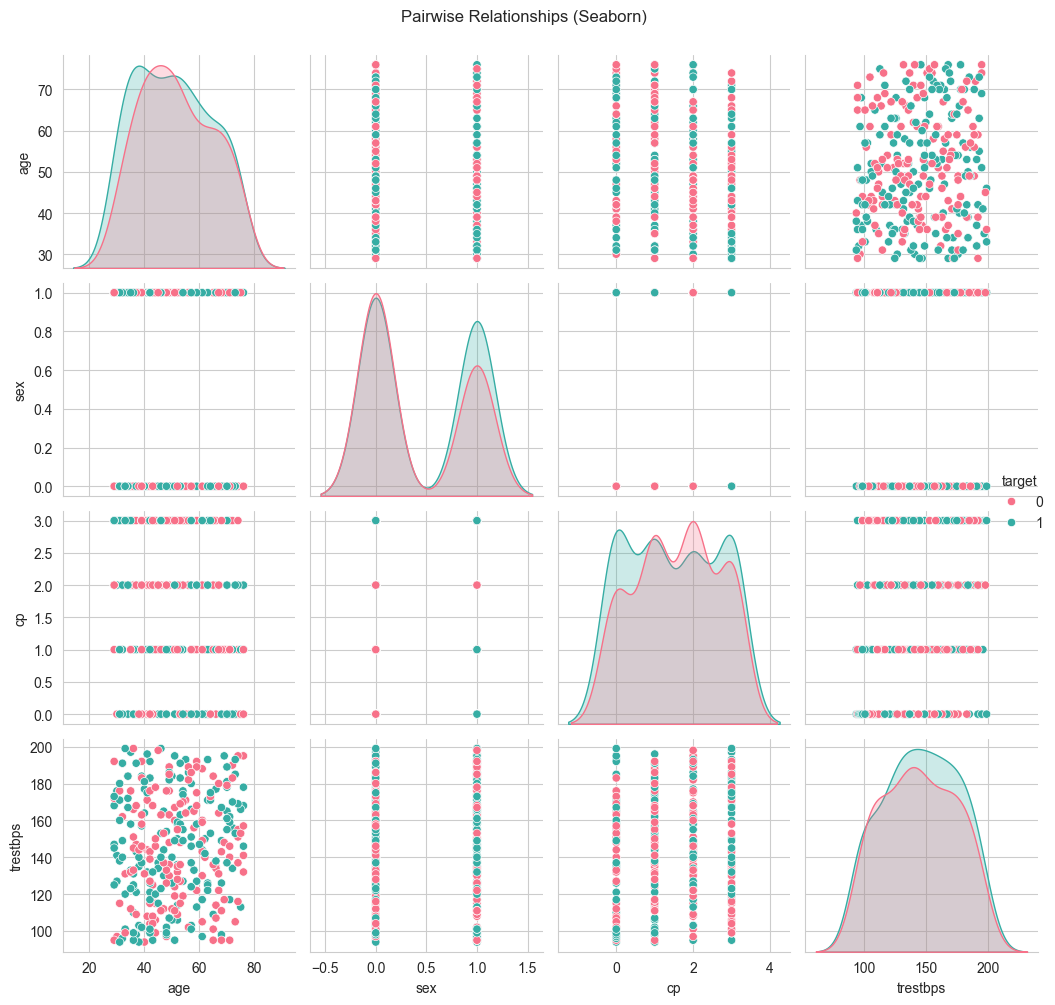

In [18]:
sns.set_style("whitegrid")
pairplot = sns.pairplot(df[features_to_plot + [target_col]],
                        hue=target_col,
                        palette="husl",
                        diag_kind="kde")
plt.suptitle('Pairwise Relationships (Seaborn)', y=1.001)
plt.tight_layout()
plt.savefig('pairplot_seaborn.png', dpi=100, bbox_inches='tight')
plt.show()

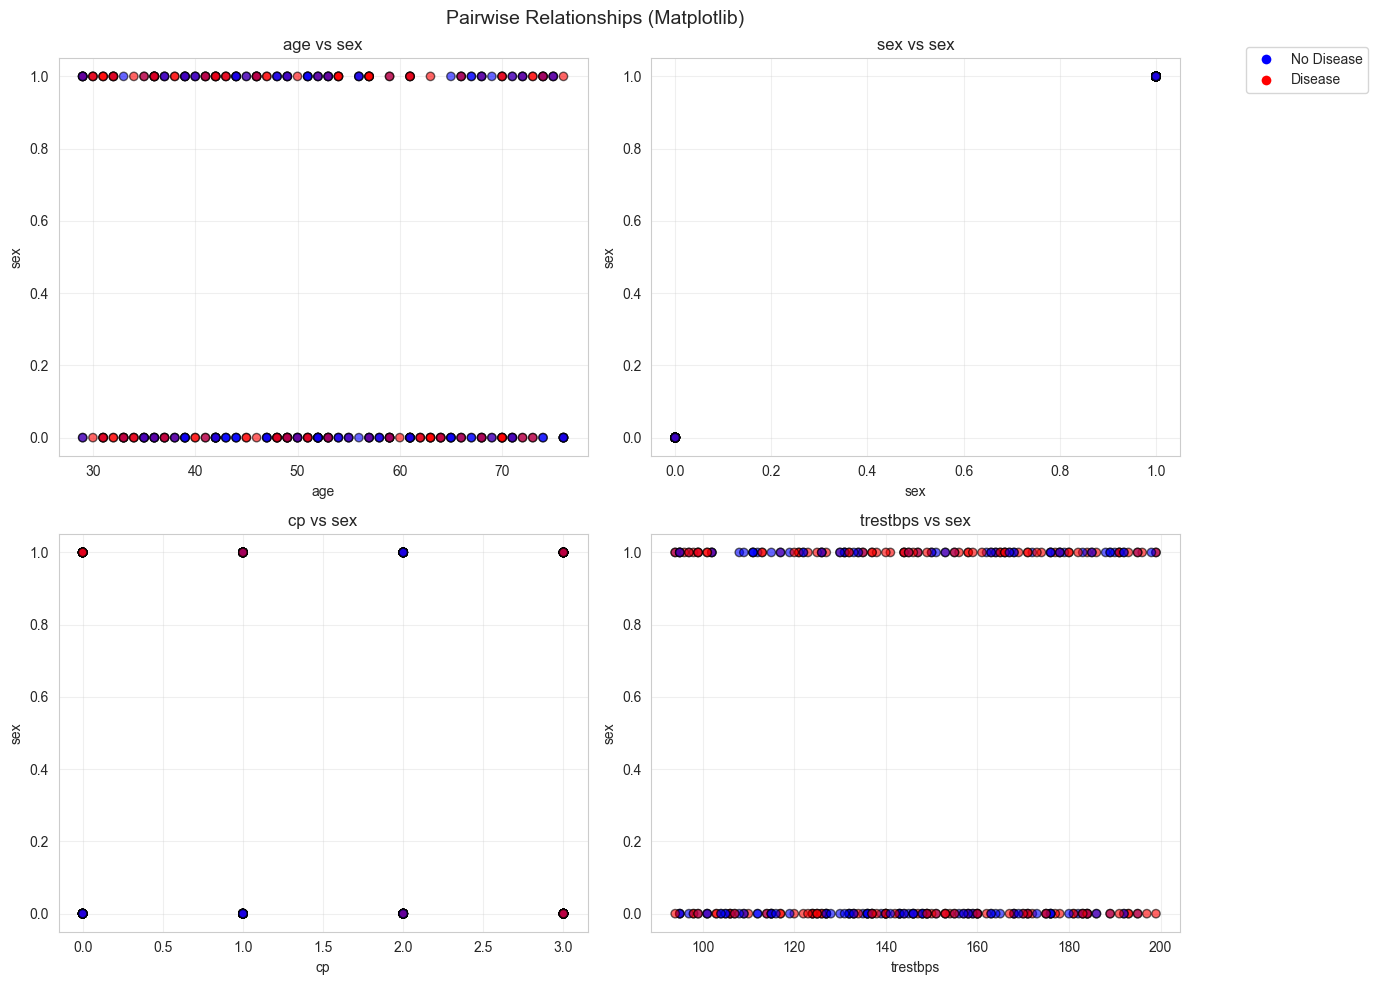

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for idx, feature in enumerate(features_to_plot):
    colors = df[target_col].map({0: 'blue', 1: 'red'})
    axes[idx].scatter(df[feature], df.iloc[:, 1], c=colors, alpha=0.6, edgecolors='k')
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel(df.columns[1])
    axes[idx].set_title(f'{feature} vs {df.columns[1]}')
    axes[idx].grid(True, alpha=0.3)

handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=8, label='No Disease'),
           plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=8, label='Disease')]
fig.legend(handles=handles, loc='upper right', bbox_to_anchor=(1.15, 0.95))
plt.suptitle('Pairwise Relationships (Matplotlib)', fontsize=14)
plt.tight_layout()
plt.savefig('pairplot_matplotlib.png', dpi=100, bbox_inches='tight')
plt.show()

In [20]:
missing_values = df.isnull().sum()
print(f"Missing values:\n{missing_values}\n")

if missing_values.sum() > 0:
    print("→ Replacing missing values with median...")
    for column in df.columns[:-1]:  # Exclude target
        if df[column].isnull().sum() > 0:
            median_value = df[column].median()
            df[column].fillna(median_value, inplace=True)
            print(f"  Column '{column}': filled with median {median_value}")
    print("✓ Missing values replaced\n")
else:
    print("✓ No missing values found in dataset\n")

Missing values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

✓ No missing values found in dataset



In [21]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print(f"Original feature mean (first 3): {X.iloc[:, :3].mean().values}")
print(f"Scaled feature mean (first 3): {X_scaled.iloc[:, :3].mean().values}")
print(f"Original feature std (first 3): {X.iloc[:, :3].std().values}")
print(f"Scaled feature std (first 3): {X_scaled.iloc[:, :3].std().values}")
print("✓ Features standardized using StandardScaler\n")

Original feature mean (first 3): [51.09570957  0.43234323  1.52475248]
Scaled feature mean (first 3): [-1.40701532e-16  2.93128191e-17  1.17251277e-17]
Original feature std (first 3): [13.43370088  0.49622094  1.10622016]
Scaled feature std (first 3): [1.00165426 1.00165426 1.00165426]
✓ Features standardized using StandardScaler



In [22]:
X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(
    X_scaled, y, test_size=0.30, random_state=42, stratify=y
)
print(f"Split 1 (70-30):")
print(f"  Train set: {X_train_70.shape[0]} samples")
print(f"  Test set: {X_test_30.shape[0]} samples\n")

Split 1 (70-30):
  Train set: 212 samples
  Test set: 91 samples



In [23]:
X_train_80, X_test_20, y_train_80, y_test_20 = train_test_split(
    X_scaled, y, test_size=0.20, random_state=42, stratify=y
)
print(f"Split 2 (80-20):")
print(f"  Train set: {X_train_80.shape[0]} samples")
print(f"  Test set: {X_test_20.shape[0]} samples")
print("✓ Dataset split completed\n")

Split 2 (80-20):
  Train set: 242 samples
  Test set: 61 samples
✓ Dataset split completed



In [24]:
lr_model_70 = LogisticRegression(max_iter=1000, random_state=42)
lr_model_70.fit(X_train_70, y_train_70)
y_pred_70 = lr_model_70.predict(X_test_30)
print(f"Model coefficients shape: {lr_model_70.coef_.shape}\n")

Model coefficients shape: (1, 13)



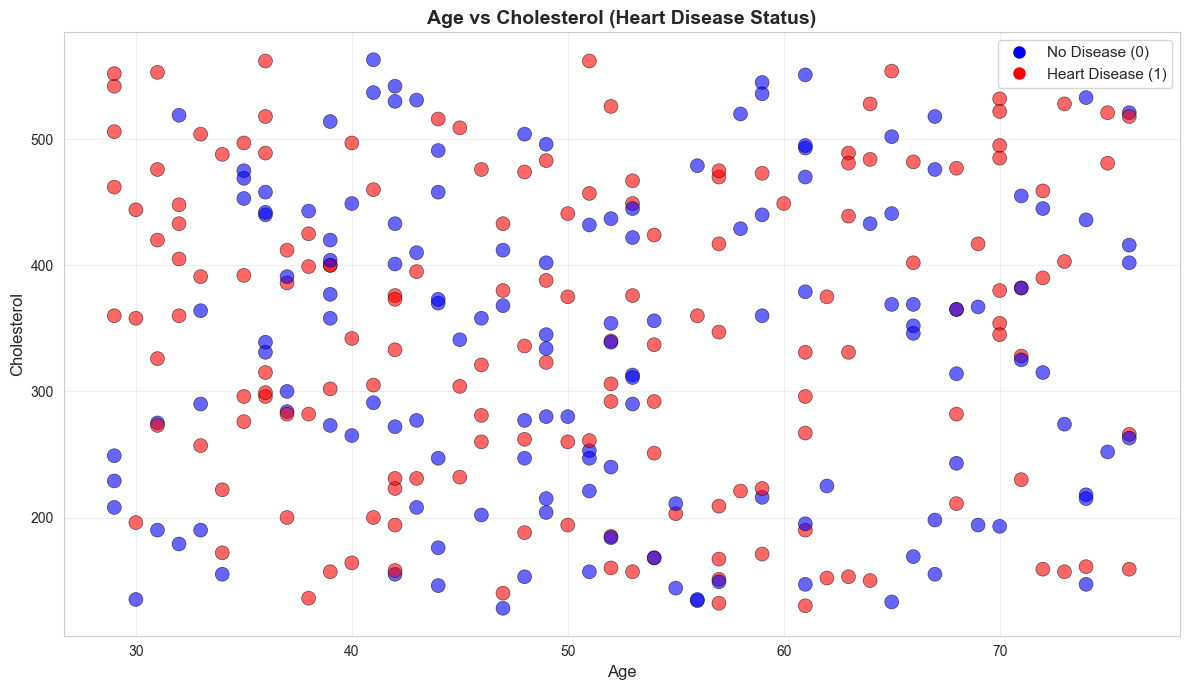

In [26]:
X_original = df.iloc[:, :-1]
y_original = df.iloc[:, -1]

plt.figure(figsize=(12, 7))
colors = y_original.map({0: 'blue', 1: 'red'})
scatter = plt.scatter(X_original['age'], X_original['chol'],
                      c=colors, alpha=0.6, s=100, edgecolors='black', linewidth=0.5)

plt.xlabel('Age', fontsize=12)
plt.ylabel('Cholesterol', fontsize=12)
plt.title('Age vs Cholesterol (Heart Disease Status)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue',
                      markersize=10, label='No Disease (0)'),
           plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red',
                      markersize=10, label='Heart Disease (1)')]
plt.legend(handles=handles, fontsize=11, loc='upper right')

plt.tight_layout()
plt.savefig('age_vs_cholesterol.png', dpi=100, bbox_inches='tight')
plt.show()